# Mommy Fortuna's Midnight Carnival of Python Oddities

## Exhibit 1: The Wonders and Pitfalls of Promotion

Numerical variables in the Python language have associated data types,
but you may not have noticed because Python automatically
converts between them.  However, the behavior of this conversion
can depend on the data type, so be careful.

In [1]:
print 1.0/2 # a float divided by an integer
print 1/2 # Python2 behavior (restart if overwritten by next line)
from __future__ import division # Python3 behavior
print 1/2
print 1 // 2 # Python3 nomenclature for integer division

0.5
0
0.5
0


In [4]:
print [0] * 2 # list times an integer
print [0] * 2. # list times a float causes an exception

[0, 0]


TypeError: can't multiply sequence by non-int of type 'float'

## Exhibit 2: Precision, and the Lack Thereof

Numpy has a stricter notation of data types.  The data type of
an array is static, but numpy will promote data types when
you perform an operation that creates a new array.   Numpy
data types often behave differently than their Python cousins.

In [6]:
import numpy as np
x = np.array([0, 1, 2])
print x.dtype
print (x * 1.).dtype # a new array is created with promoted type
x *= 1. # error: the new promoted array cannot be assigned to the original

int64
float64


TypeError: Cannot cast ufunc multiply output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

Depending on the data type, results can only be represented with a finite precision.

In [10]:
dtypes = [np.int16, np.int32, np.int64, np.float32, np.float64]

for dtype in dtypes:
    data = np.array([1,1,3],dtype=dtype)
    print dtype, np.average(data) * 3

<type 'numpy.int16'> 5.0
<type 'numpy.int32'> 5.0
<type 'numpy.int64'> 5.0
<type 'numpy.float32'> 4.99999988079
<type 'numpy.float64'> 5.0


Beware the finite precision of floats!

In [11]:
for dtype in dtypes:
    print dtype, np.array([2], dtype=dtype)**31

<type 'numpy.int16'> [0]
<type 'numpy.int32'> [-2147483648]
<type 'numpy.int64'> [2147483648]
<type 'numpy.float32'> [  2.14748365e+09]
<type 'numpy.float64'> [  2.14748365e+09]


In [12]:
print np.sin(np.pi), np.cos(np.pi/2)

1.22464679915e-16 6.12323399574e-17


For large values, integers may wrap and floats may behave unexpectedly.

In [13]:
for dtype in dtypes:
    big_number = np.array([2], dtype=dtype)**30
    print dtype, (big_number + 1) - 2**30

<type 'numpy.int16'> [-1073741823]
<type 'numpy.int32'> [1]
<type 'numpy.int64'> [1]
<type 'numpy.float32'> [ 0.]
<type 'numpy.float64'> [ 1.]


In [14]:
print np.log(np.exp(1000))
print np.exp(np.log(1000))

inf
1000.0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [15]:
print np.array([1.])/0
print 1./0

[ inf]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


ZeroDivisionError: float division by zero

## Exhibit 3: Numerical Instability

Numerical precision can have unexpected effects on numerical code.
For example, polynomial fitting grows unstable for large-degree polynimals.
Numerical stability is tricky to track down and can be platform dependent.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RankWarning: Polyfit may be poorly conditioned


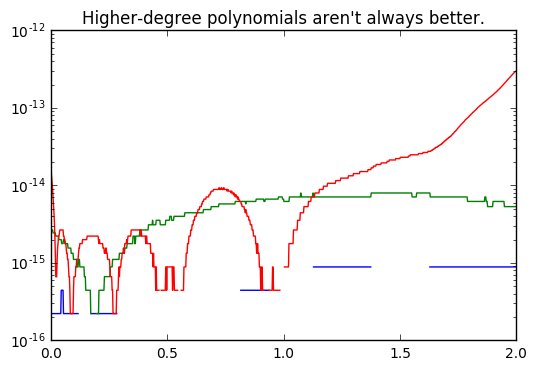

In [16]:
x = np.linspace(0,2,1024)
y = 3*x + 1 # fitting to linear data should ideally be perfect
p1 = np.polyfit(x,y,deg=1)
p2 = np.polyfit(x,y,deg=2)
p20 = np.polyfit(x,y,deg=20)
%matplotlib inline
import pylab as plt
plt.title("Higher-degree polynomials aren't always better.")
plt.semilogy(x, np.abs(np.polyval(p1, x) - y), 'b')
plt.semilogy(x, np.abs(np.polyval(p2, x) - y), 'g')
plt.semilogy(x, np.abs(np.polyval(p20, x) - y), 'r')
plt.show()

## Exhibit 4: When is a Duck When it Isn't

Sometimes, variables are completely independent from each other.  Sometimes
they actually refer to the same underlying object.  Python calls
this behavior 'mutability'.  Some data types are mutable (variables point
to the same object), while others are immutable.

In [20]:
a = 1
b = a
a = 2
print a, b
a = [1]
b = a
a[0] = 2
print a, b

2 1
[2] [2]


In [22]:
def double_it(x):
    x *= 2
    return x

a = 1
print double_it(a), a
a = [1]
print double_it(a), a
a = (1,)
print double_it(a), a

2 1
[1, 1] [1, 1]
(1, 1) (1,)


In [24]:
x = [0] * 5
x[1] = 3
print x
x = [[0]] * 5
x[1][0] = 3
print x

[0, 3, 0, 0, 0]
[[3], [3], [3], [3], [3]]


## Exhibit 5: Disorder

Some attributes, notably the iteration order of dictionaries, are
arbitrary and change between platforms, or even between serialization
and de-serialization (e.g. when writing to disk).  Good code should
not rely on aspects of these attributes that are not guaranteed.

In [23]:
import cPickle
d = {'dog':'woof','cat':'meow','bird':'tweet',
     'mouse':'squeak','cow':'moo', 'frog':'croak',
     'elephant':'toot','duck':'quack','fish':'blub',
     'seal':'ow ow ow','fox':None}
print d.keys()
s = cPickle.dumps(d)
d2 = cPickle.loads(s)
print d2.keys()

['fish', 'duck', 'seal', 'mouse', 'cow', 'fox', 'dog', 'frog', 'cat', 'elephant', 'bird']
['elephant', 'cow', 'fish', 'duck', 'fox', 'dog', 'frog', 'cat', 'seal', 'mouse', 'bird']
